In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pathlib import Path

# Testing for val_exps and non_zeros

In [2]:
def get_accuracy_top1(j=6, h=0, p=6, k=250):
    asif_value = 0
    with open(f'retrieval_wav2vec2_layer{j}_glove_layer{h}_p{p}_k{k}.json', 'r') as f:
        retrieval = json.load(f)
    words = []
    count_top1 = 0 
    keys_test = [retrieval['all_values'][i] for i in retrieval['rows_deleted']]
    total = len(keys_test)
    for i in range(total):
        word = keys_test[i]
        k_1 = retrieval['retrieval_indices'][i][0]
        if word == retrieval['keys_anchors'][k_1]:
            count_top1 += 1
    asif_value = count_top1 / total
    return asif_value, words 


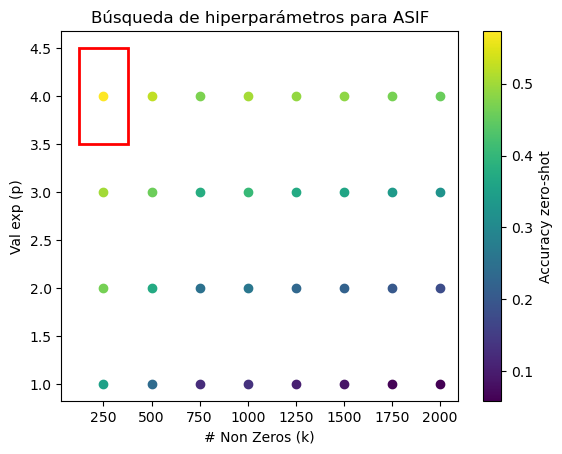

In [3]:
# Define the ranges for val_exp and non_zeros
val_exp_range = np.arange(1, 5, 1)  # from 1 to 4 inclusive
non_zeros_range = np.arange(250, 2001, 250)  # from 250 to 2000 inclusive with a step of 250

# Generate data
data = np.zeros((len(val_exp_range), len(non_zeros_range)))

for i, val_exp in enumerate(val_exp_range):
    for j, non_zeros in enumerate(non_zeros_range):
        data[i, j] = get_accuracy_top1(j=6, h=0, p=val_exp, k=non_zeros)[0]

fig, ax = plt.subplots()

cmap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=data.min(), vmax=data.max())

for i, val_exp in enumerate(val_exp_range):
    for j, non_zeros in enumerate(non_zeros_range):
        ax.scatter(non_zeros, val_exp, color=cmap(norm(data[i, j])))

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Accuracy zero-shot')

highlight_point_val_exp = 4  
highlight_point_non_zeros = 250  

highlight_val_exp_idx = np.where(val_exp_range == highlight_point_val_exp)[0][0]
highlight_non_zeros_idx = np.where(non_zeros_range == highlight_point_non_zeros)[0][0]

rect = plt.Rectangle((highlight_point_non_zeros - 125, highlight_point_val_exp - 0.5), 250, 1, 
                     edgecolor='red', facecolor='none', linewidth=2)
ax.add_patch(rect)

ax.set_title('Búsqueda de hiperparámetros para ASIF')
ax.set_xlabel('# Non Zeros (k)')
ax.set_ylabel('Val exp (p)')

plt.show()

In [4]:
# Testing more points (val_exp, non_zeros)
additional_points = [
    (1, 100),
    (2, 100),
    (3, 100),
    (4, 10),
    (4, 50),
    (4, 100),
    (4, 150),
    (4, 200),
    (4, 250),  
    (5, 250),  
    (6, 250),
    (7, 250),
    (8, 250),
    (9, 250),   
]

for val_exp, non_zeros in additional_points:
    accuracy = get_accuracy_top1(j=6, h=0, p=val_exp, k=non_zeros)[0]
    print(f'val_exp: {val_exp} and non_zeros: {non_zeros} with zero-shot accuracy: {accuracy}')

val_exp: 1 and non_zeros: 100 with zero-shot accuracy: 0.49864960909737027
val_exp: 2 and non_zeros: 100 with zero-shot accuracy: 0.5319118692253021
val_exp: 3 and non_zeros: 100 with zero-shot accuracy: 0.557498223169865
val_exp: 4 and non_zeros: 10 with zero-shot accuracy: 0.30632551528073915
val_exp: 4 and non_zeros: 50 with zero-shot accuracy: 0.5756929637526652
val_exp: 4 and non_zeros: 100 with zero-shot accuracy: 0.5466950959488273
val_exp: 4 and non_zeros: 150 with zero-shot accuracy: 0.5951670220326937
val_exp: 4 and non_zeros: 200 with zero-shot accuracy: 0.5916133617626155
val_exp: 4 and non_zeros: 250 with zero-shot accuracy: 0.5732764747690121
val_exp: 5 and non_zeros: 250 with zero-shot accuracy: 0.579957356076759
val_exp: 6 and non_zeros: 250 with zero-shot accuracy: 0.6336886993603411
val_exp: 7 and non_zeros: 250 with zero-shot accuracy: 0.6240227434257285
val_exp: 8 and non_zeros: 250 with zero-shot accuracy: 0.6122245913290689
val_exp: 9 and non_zeros: 250 with zero-

# Experiment 1.2

In [5]:
layers = np.arange(0, 12, 1) 
asif_glove = np.zeros(12)

for i in layers:
    asif_glove[i] = get_accuracy_top1(j=i, h=0, p=6, k=250)[0]

In [6]:
file_path = Path('cka_glove_wav2vec2.json')

with file_path.open('r', encoding='utf-8') as file:
    wav_vs_glove = json.load(file)

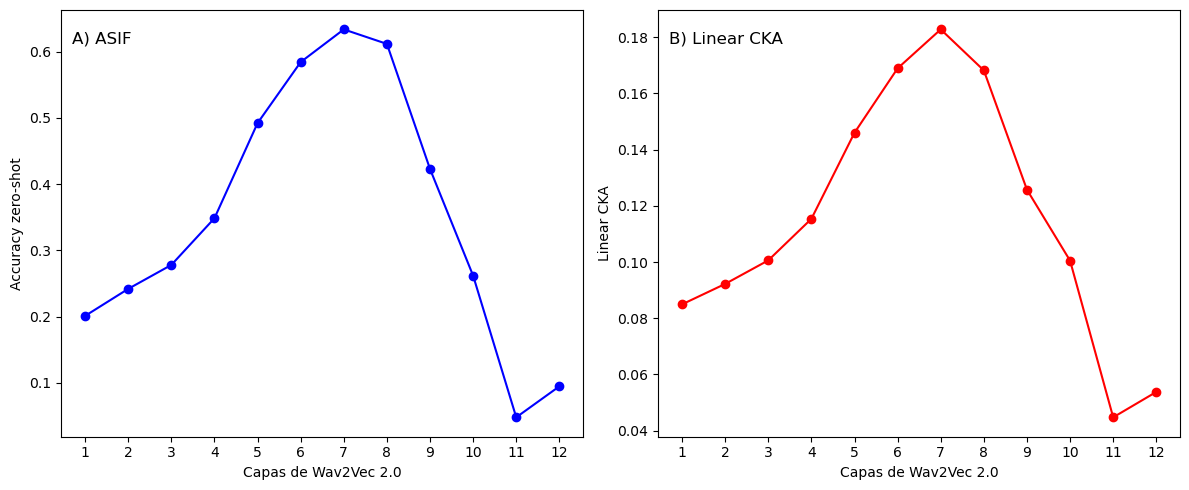

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  

# Plot for ASIF-GloVe
ax1.plot(np.arange(1, 13, 1), asif_glove, color='blue', marker='o')
ax1.set_xlabel('Capas de Wav2Vec 2.0')
ax1.set_ylabel('Accuracy zero-shot')
ax1.set_xticks(np.arange(1, 13, 1))
ax1.text(0.02, 0.95, 'A) ASIF', transform=ax1.transAxes, fontsize=12, verticalalignment='top')  

# Plot for Wav2Vec vs. GloVe
ax2.plot(np.arange(1, 13, 1), wav_vs_glove, color='red', marker='o')
ax2.set_xlabel('Capas de Wav2Vec 2.0')
ax2.set_ylabel('Linear CKA')
ax2.set_xticks(np.arange(1, 13, 1))
ax2.text(0.02, 0.95, 'B) Linear CKA', transform=ax2.transAxes, fontsize=12, verticalalignment='top') 

plt.tight_layout()
plt.show()